In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's begin at the beginning and get a dataset - I'm going to use all NBA box score data from 2012-2018 for this exercise.

In [2]:
df = pd.read_csv(r'C:\Users\JohnSteph\Documents\thinkful\nba-enhanced-stats\2012-18_teamBoxScore.csv')

What happens when we first look over a scatter of average points scored vs average points against?

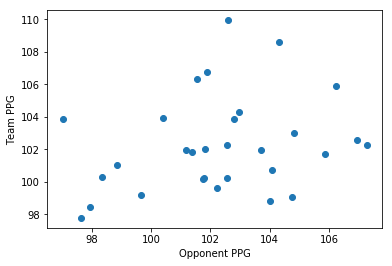

In [3]:
plt.scatter(x = df.groupby('teamAbbr')['opptPTS'].mean(), y = df.groupby('teamAbbr')['teamPTS'].mean())
plt.xlabel('Opponent PPG')
plt.ylabel('Team PPG')
plt.show()

This isn't very useful! There's no clear correlation between offensive and defensive success. Let's take this a step further and see if we can correlate winning to *net* PPG.

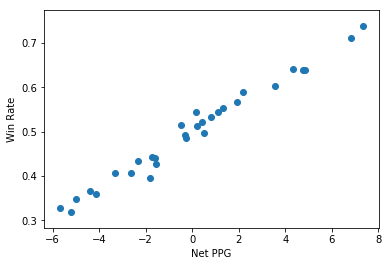

In [4]:
net_ppg = df.groupby('teamAbbr')['teamPTS'].mean() - df.groupby('teamAbbr')['opptPTS'].mean()
wins = df[df['teamRslt'].str.contains("Win")].groupby('teamAbbr').size()
losses = df[df['teamRslt'].str.contains("Loss")].groupby('teamAbbr').size()
win_rate = wins / (wins + losses)
plt.scatter(x = net_ppg, y = win_rate)
plt.xlabel('Net PPG')
plt.ylabel('Win Rate')
plt.show()

Now we're starting to see something! This follows the intuition that outscoring opponents by more generally leads to more winning. Do any teams in particular stand out?

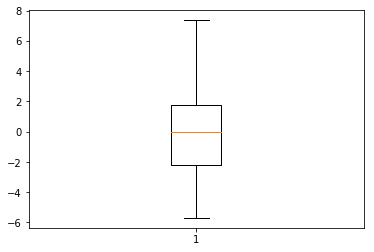

In [5]:
plt.boxplot(net_ppg)
plt.show()

It doesn't appear that there are any particularly extreme outliers here - this makes sense given the large sample size of games (6 full seasons * 82 games per season per team). Let's at least see who our best and worst teams are...

In [6]:
print(net_ppg.sort_values())

teamAbbr
PHI   -5.699187
ORL   -5.193089
LAL   -4.995935
PHO   -4.398374
SAC   -4.138211
BKN   -3.321138
NY    -2.640244
MIL   -2.321138
MIN   -1.817073
NO    -1.727642
CHA   -1.575203
DET   -1.550813
CHI   -0.483740
DEN   -0.286585
DAL   -0.260163
MEM    0.166667
WAS    0.223577
ATL    0.443089
UTA    0.500000
BOS    0.818737
CLE    1.103659
POR    1.325203
IND    1.930754
MIA    2.201220
TOR    3.548780
HOU    4.319106
LAC    4.770325
OKC    4.863821
SA     6.839431
GS     7.359756
dtype: float64


Unsurprisingly, Golden State shows up as the best team and Philadelphia as the worst over this time frame (#TrustTheProcess). Let's delve into the differences between these 2 teams and see if we can't figure out other aspects that increase the likelihood of winning. What if we look at overall team stats from this time period?

In [7]:
print(df[['teamAbbr', 'teamPTS', 'teamAST', 'teamTO', 'teamSTL', 'teamBLK', 'teamPF', 'teamTRB']].groupby('teamAbbr').mean())

             teamPTS    teamAST     teamTO   teamSTL   teamBLK     teamPF  \
teamAbbr                                                                    
ATL       101.808943  24.682927  15.111789  8.424797  4.695122  18.646341   
BKN       100.739837  21.593496  14.926829  7.347561  4.369919  19.808943   
BOS       101.989817  23.362525  14.138493  7.940937  4.209776  20.973523   
CHA       100.158537  21.258130  12.502033  6.733740  5.205285  17.896341   
CHI        99.180894  22.705285  14.101626  7.036585  5.038618  18.796748   
CLE       103.898374  22.115854  13.910569  7.121951  3.941057  19.436992   
DAL       102.286585  22.485772  12.900407  7.666667  4.256098  19.752033   
DEN       105.932927  23.619919  14.995935  7.778455  5.048780  20.888211   
DET       100.243902  21.182927  13.660569  7.441057  4.290650  19.063008   
GS        109.936992  26.977642  15.028455  8.341463  5.920732  20.443089   
HOU       108.632114  22.630081  15.713415  8.672764  4.873984  20.654472   

Surprisingly, Philadelphia does outperform Golden State in one aspect - they averaged more steals over these 6 seasons. Are steals not very well correlated to winning, then?

In [8]:
gs = df.loc[df['teamAbbr'] == 'GS']
phi = df.loc[df['teamAbbr'] == 'PHI']